**WORK WITH TIME-SERIES DATA:**

Data preprocessing methodology:

- When working with time-series data such as Bitcoin prediction problem, it is recommended to set `shuffle=False` when splitting data into train-test. (This is because if `shuffle=True`, we may end up predicting past Bitcoin prices). <br>
For other prediction problems such as house prices or car prices, it is appropriate to set `shuffle=True` (because if `shuffle=False`, for example, the house price data is sorted by price, then there is a risk of falling into the case where all houses put into the test set have higher/lower values than the average and this will result in a poor model).

- This data is time series it's sequential, so we don't use Cross-Validation or any of the model ML techniques to evaluate error. TimeSeriesSplit, which is a specific type of cross-validation technique used for time series data. It's important to use time-series cross-validation when dealing with sequential data to avoid training on future data. TimeSeriesSplit splits the data into folds, so that the folds with data from the previous past will be used as the training set, and the future data will only be used as the test set. For example, if we split the data into 3 folds, each fold would consist of:
    - Fold 1: Data from January 2016 to December 2017 (training set) and data from January 2018 to December 2018 (test set).    
    - Fold 2: Data from January 2016 to December 2018 (training set) and data from January 2019 to December 2019 (test set).    
    - Fold 3: Data from January 2016 to December 2019 (training set) and data from January 2020 to December 2020 (test set). <br>

The code: `tscv = TimeSeriesSplit(n_splits=3)` will creat a time-series cross-validation object that splits the data into 3 folds in chronological order.

- It's convenient: to have data ORDERED IN INCREASING ORDER OF DATE(with Time-Series Data)

Note: Update thêm 1 hàm DA so với code ở file: MultiLinearReg.ipynb. 
- Hàm directional_accuracy tính toán phần trăm dự đoán đúng hướng tăng/giảm so với giá trị thực.

```python
    def directional_accuracy(self, y_true, y_pred):
        """
        Calculate the Directional Accuracy (DA).
        """
        return np.mean((np.sign(y_true[1:].values - y_true[:-1].values) ==
                        np.sign(y_pred[1:] - y_pred[:-1])))
```

Dữ liệu được scale trước khi training và inverse transform trước khi đánh giá. ???


### **Giải thích ARIMA cho học sinh cấp 2**

---

#### **1. ARIMA là gì?**
- Hãy tưởng tượng bạn muốn dự đoán **thời tiết ngày mai**, ví dụ: liệu ngày mai có mưa không?
- ARIMA là một phương pháp giúp **dự đoán tương lai** bằng cách **nhìn lại những gì đã xảy ra trong quá khứ**. 
- Nó giống như bạn quan sát thời tiết hôm qua, tuần trước, rồi dùng những gì đã học được để đoán xem ngày mai sẽ thế nào.

---

#### **2. Tên gọi ARIMA nghĩa là gì?**

Chia nhỏ thành 3 phần để dễ hiểu:

1. **AR (Autoregressive - Hồi quy tự hồi):**
   - Dùng các giá trị **trong quá khứ** để dự đoán hiện tại.
   - Ví dụ: 
     - Nếu bạn biết hôm qua trời có mưa nhỏ, có thể hôm nay sẽ mưa nhiều hơn một chút.
     - AR giống như bạn hỏi: **"Những ngày trước đã xảy ra gì?"**

2. **I (Integrated - Tích hợp):**
   - Loại bỏ xu hướng **tăng hoặc giảm** trong dữ liệu, để tập trung vào sự thay đổi thực sự.
   - Ví dụ: 
     - Nếu mỗi ngày lượng mưa tăng thêm 1 mm, ARIMA sẽ chỉ tập trung vào phần thay đổi bất thường (ví dụ: hôm nay tăng thêm 3 mm thay vì chỉ 1 mm).
     - \( I \) giống như bạn hỏi: **"Điều gì đang thay đổi so với bình thường?"**

3. **MA (Moving Average - Trung bình trượt):**
   - Sửa lỗi dự đoán dựa trên **những gì mô hình đã làm sai trước đây**.
   - Ví dụ:
     - Nếu hôm qua bạn dự đoán sai (đoán sẽ không mưa, nhưng trời lại mưa), MA sẽ học từ sai lầm đó để dự đoán tốt hơn hôm nay.
     - MA giống như bạn hỏi: **"Tôi đã sai ở đâu lần trước, và làm thế nào để sửa lỗi?"**

---

#### **3. Cách hoạt động của ARIMA**

Hãy tưởng tượng bạn đang làm một bài toán dự đoán số lượng bánh mì mà cửa hàng bán được mỗi ngày:

- **AR (Dùng số lượng bán hôm qua):**
  - Nếu hôm qua cửa hàng bán được 100 ổ bánh, hôm nay có thể cũng bán gần 100 ổ bánh.
  
- **I (Nhìn vào sự thay đổi):**
  - Nếu bạn nhận ra mỗi ngày số bánh bán được tăng thêm 10 ổ, bạn sẽ dự đoán hôm nay có thể bán được 110 ổ.

- **MA (Sửa sai lầm):**
  - Nếu bạn dự đoán sai hôm qua (dự đoán 110 ổ nhưng thực tế bán 120 ổ), bạn sẽ điều chỉnh dự đoán hôm nay tốt hơn.

---

#### **4. Ví dụ thực tế**
Giả sử bạn muốn dự đoán doanh thu của một cửa hàng qua các ngày:

| Ngày        | Doanh thu thực tế (VNĐ) | Dự đoán ban đầu (VNĐ) | Sai số (VNĐ) |
|-------------|--------------------------|------------------------|--------------|
| Thứ Hai     | 100.000                 |                        |              |
| Thứ Ba      | 110.000                 | 105.000                | +5.000       |
| Thứ Tư      | 120.000                 | 115.000                | +5.000       |

ARIMA sẽ:
1. **AR:** Dùng doanh thu ngày hôm trước để ước tính ngày hôm nay.
2. **I:** Nhìn vào sự thay đổi giữa các ngày (tăng thêm 10.000 VNĐ mỗi ngày).
3. **MA:** Điều chỉnh dự đoán bằng cách học từ sai số trước đó (thêm 5.000 VNĐ vào dự đoán).

Kết quả:
- Dự đoán doanh thu Thứ Năm: 130.000 VNĐ (vì ARIMA biết doanh thu đang tăng đều mỗi ngày).

---

#### **5. Tóm tắt: Vì sao ARIMA hữu ích?**

- **Dễ hiểu:** ARIMA dựa trên các mẫu dữ liệu (patterns) từ quá khứ.
- **Thông minh:** Học cách sửa sai từ dự đoán trước đó.
- **Ứng dụng rộng rãi:** Dự đoán thời tiết, doanh thu, số học sinh đến trường, lưu lượng giao thông, và nhiều hơn nữa.

---

Học sinh cấp 2 có thể hình dung ARIMA như một **người dự đoán tương lai dựa trên trí nhớ và khả năng học từ sai lầm**, giúp dự đoán chính xác hơn theo thời gian!


#### **So sánh ARIMA với các thuật toán khác:**

| **Thuật toán**         | **Dùng cho loại dữ liệu nào**               | **Điểm mạnh**                                    | **Điểm yếu**                                    |
|-------------------------|--------------------------------------------|------------------------------------------------|------------------------------------------------|
| **Linear Regression**   | Dữ liệu không có tính thời gian            | Đơn giản, dễ hiểu                               | Không hiểu được chuỗi thời gian                |
| **Lasso & Ridge**       | Dữ liệu nhiều yếu tố                       | Giảm phức tạp, giảm overfitting                | Không thể xử lý xu hướng hoặc chu kỳ dài hạn    |
| **ARIMA**               | Chuỗi thời gian ổn định, có xu hướng rõ ràng| Tốt với chuỗi thời gian ngắn hạn               | Không hiệu quả nếu dữ liệu không ổn định hoặc quá phức tạp |
| **LSTM**                | Chuỗi thời gian dài và phức tạp            | Hiểu mối quan hệ dài hạn, phi tuyến tính       | Tốn tài nguyên và cần dữ liệu lớn              |

---



#### **Cách thiết lập ARIMA (p, d, q):**
1. **p (Autoregressive):** Số lượng giá trị quá khứ được sử dụng.
   - Ví dụ: Giá hôm qua và hôm trước ảnh hưởng đến hôm nay → \( p = 2 \).

2. **d (Integrated):** Số lần lấy sai biệt để loại bỏ xu hướng.
   - Nếu dữ liệu có xu hướng tăng đều → \( d = 1 \) (lấy sai biệt một lần).

3. **q (Moving Average):** Số lượng sai số quá khứ được sử dụng.
   - Nếu dự đoán sai trong 2 ngày qua ảnh hưởng đến hôm nay → \( q = 2 \).

---

#### **Tóm tắt cách hoạt động:**
1. Xử lý dữ liệu (loại bỏ xu hướng với \( d \)).
2. Xác định các tham số \( p, d, q \) bằng cách thử nghiệm hoặc công cụ tự động như ACF/PACF.
3. Huấn luyện mô hình ARIMA để tìm trọng số tốt nhất.
4. Dự đoán giá trị tương lai dựa trên dữ liệu đã học.

---

ARIMA mạnh ở các bài toán có xu hướng hoặc chu kỳ, nhưng nếu dữ liệu quá phức tạp, bạn có thể cân nhắc các mô hình khác như **LSTM** để xử lý mối quan hệ phi tuyến tính.

In [8]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ----------------- ---------------------- 4.2/9.8 MB 15.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 23.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


EVALUATE METRICS ON THE TRAIN SET
R2: 0.9973708695423152
MSE: 798988.8702475395
RMSE: 893.8617735687882
MAE: 487.68231706778107
MAPE%: 1.28%

EVALUATE METRICS ON THE TEST SET
R2: -2.3554918086015624
MSE: 2134182654.481839
RMSE: 46197.21479139017
MAE: 38710.9875985244
MAPE%: 34.35%


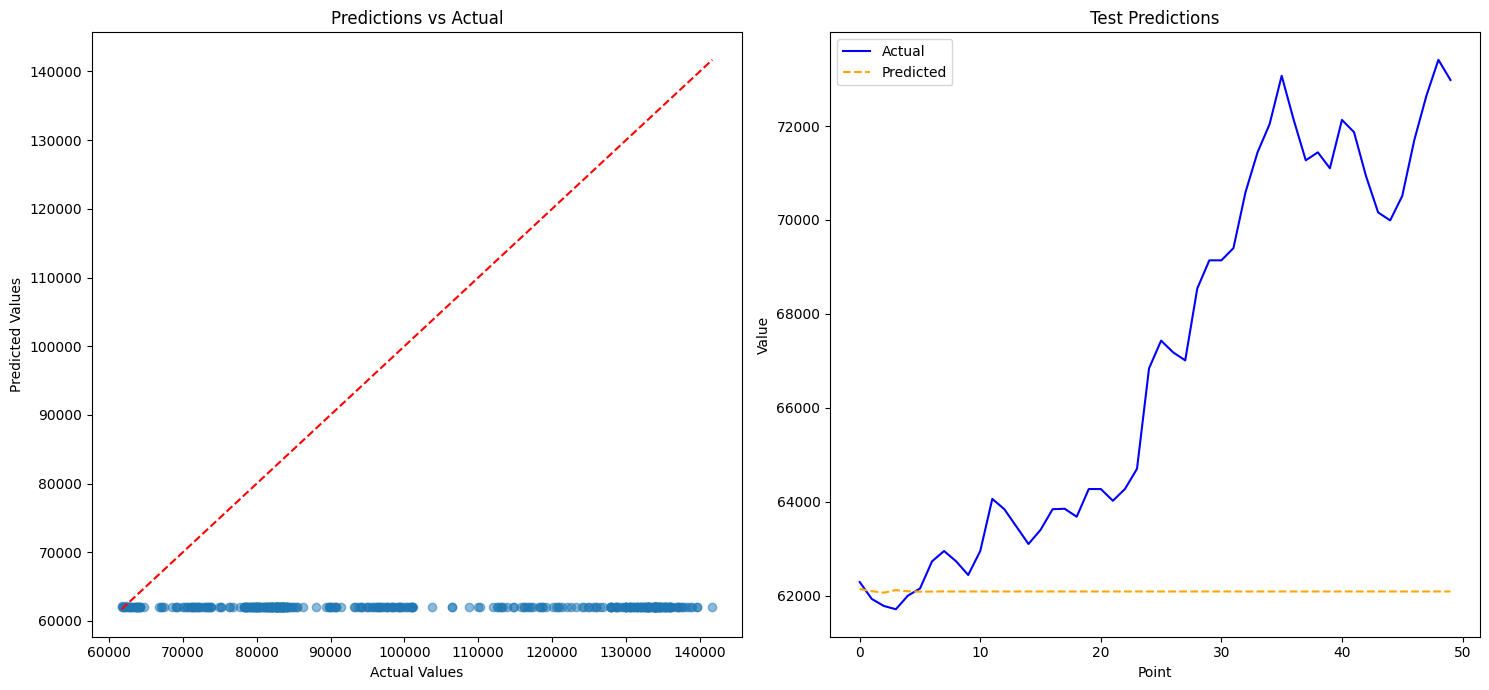

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\FPT_stock_data_TrainingModelsResults.txt


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import os

class TimeSeriesARIMAModel:
    def __init__(self, data_path, order=(5, 1, 0), output_dir=None):
        """
        Initialize the class with the file path of the dataset, ARIMA order, and output directory.
        """
        self.data_path = data_path
        self.order = order

        # Set output path
        if output_dir:
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            base_filename = os.path.basename(data_path).replace(".csv", "_TrainingModelsResults.txt")
            self.output_path = os.path.join(output_dir, base_filename)
        else:
            self.output_path = data_path.replace(".csv", "_TrainingModelsResults.txt")
        self.data = None
        self.fitted_model = None

    def load_and_preprocess_data(self):
        """
        Load the dataset and preprocess the data for ARIMA.
        """
        # Load data
        self.data = pd.read_csv(self.data_path)
        self.data["close_tomor"] = self.data["close"].shift(-1)
        self.data = self.data.iloc[:-1]  # Remove last row

        # Define target
        y = self.data["close"]

        # Split data into training and testing sets
        train_size = int(len(y) * 0.75)
        y_train, y_test = y[:train_size], y[train_size:]

        return y_train, y_test

    def train_model(self, y_train):
        """
        Train an ARIMA model on the training data.
        """
        self.fitted_model = ARIMA(y_train, order=self.order).fit()

    def evaluate_model(self, y_train, y_pred_train, y_test, y_pred_test):
        """
        Evaluate the model performance and write results to a file.
        """
        # Metrics for train set
        r2_train = r2_score(y_train, y_pred_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100

        # Metrics for test set
        r2_test = r2_score(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100

        # Print metrics
        print("EVALUATE METRICS ON THE TRAIN SET")
        print("R2:", r2_train)
        print("MSE:", mse_train)
        print("RMSE:", rmse_train)
        print("MAE:", mae_train)
        print("MAPE%:", f"{mape_train:.2f}%")
        print("\nEVALUATE METRICS ON THE TEST SET")
        print("R2:", r2_test)
        print("MSE:", mse_test)
        print("RMSE:", rmse_test)
        print("MAE:", mae_test)
        print("MAPE%:", f"{mape_test:.2f}%")

        # Write results to file
        with open(self.output_path, "a") as file:
            file.write(f"Model: ARIMA Model (order={self.order})\n")
            file.write(f"File Path: {self.data_path}\n")
            file.write("TRAIN SET METRICS:\n")
            file.write(f"R2: {r2_train:.4f}\n")
            file.write(f"MSE: {mse_train:.4f}\n")
            file.write(f"RMSE: {rmse_train:.4f}\n")
            file.write(f"MAE: {mae_train:.4f}\n")
            file.write(f"MAPE%: {mape_train:.2f}%\n\n")
            file.write("TEST SET METRICS:\n")
            file.write(f"R2: {r2_test:.4f}\n")
            file.write(f"MSE: {mse_test:.4f}\n")
            file.write(f"RMSE: {rmse_test:.4f}\n")
            file.write(f"MAE: {mae_test:.4f}\n")
            file.write(f"MAPE%: {mape_test:.2f}%\n")
            file.write("=" * 50 + "\n")

    def plot_predictions(self, y_test, y_pred_test, num_samples=50):
        """
        Plot predictions vs actual values.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Scatter plot
        ax1.scatter(y_test, y_pred_test, alpha=0.5)
        ax1.set_title("Predictions vs Actual")
        ax1.set_xlabel("Actual Values")
        ax1.set_ylabel("Predicted Values")
        ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

        # Line plot
        x_points = range(min(num_samples, len(y_test)))
        ax2.plot(x_points, y_test[:len(x_points)], 'b-', label='Actual')
        ax2.plot(x_points, y_pred_test[:len(x_points)], 'orange', linestyle='--', label='Predicted')

        ax2.set_title("Test Predictions")
        ax2.set_xlabel("Point")
        ax2.set_ylabel("Value")
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def process(self):
        """
        Execute the full pipeline: load, preprocess, train, evaluate, and plot.
        """
        y_train, y_test = self.load_and_preprocess_data()
        self.train_model(y_train)

        # Generate predictions
        y_pred_train = self.fitted_model.fittedvalues
        y_pred_test = self.fitted_model.forecast(steps=len(y_test))

        # Evaluate model
        self.evaluate_model(y_train, y_pred_train, y_test, y_pred_test)

        # Plot predictions
        self.plot_predictions(y_test, y_pred_test)

        # Notify results
        print(f"Results have been saved to: {self.output_path}")


# Example usage for one file
data_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv"
output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results"

model = TimeSeriesARIMAModel(data_path, order=(5, 1, 0), output_dir=output_dir)
model.process()


## Chạy 1 loạt file 

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMG_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9924467544482553
MSE: 487130.2487974339
RMSE: 697.9471676261993
MAE: 412.11677824961174
MAPE%: 1.80%

EVALUATE METRICS ON THE TEST SET
R2: -1.1589328805200618
MSE: 194898617.49779537
RMSE: 13960.60949592801
MAE: 10289.91623764164
MAPE%: 19.40%


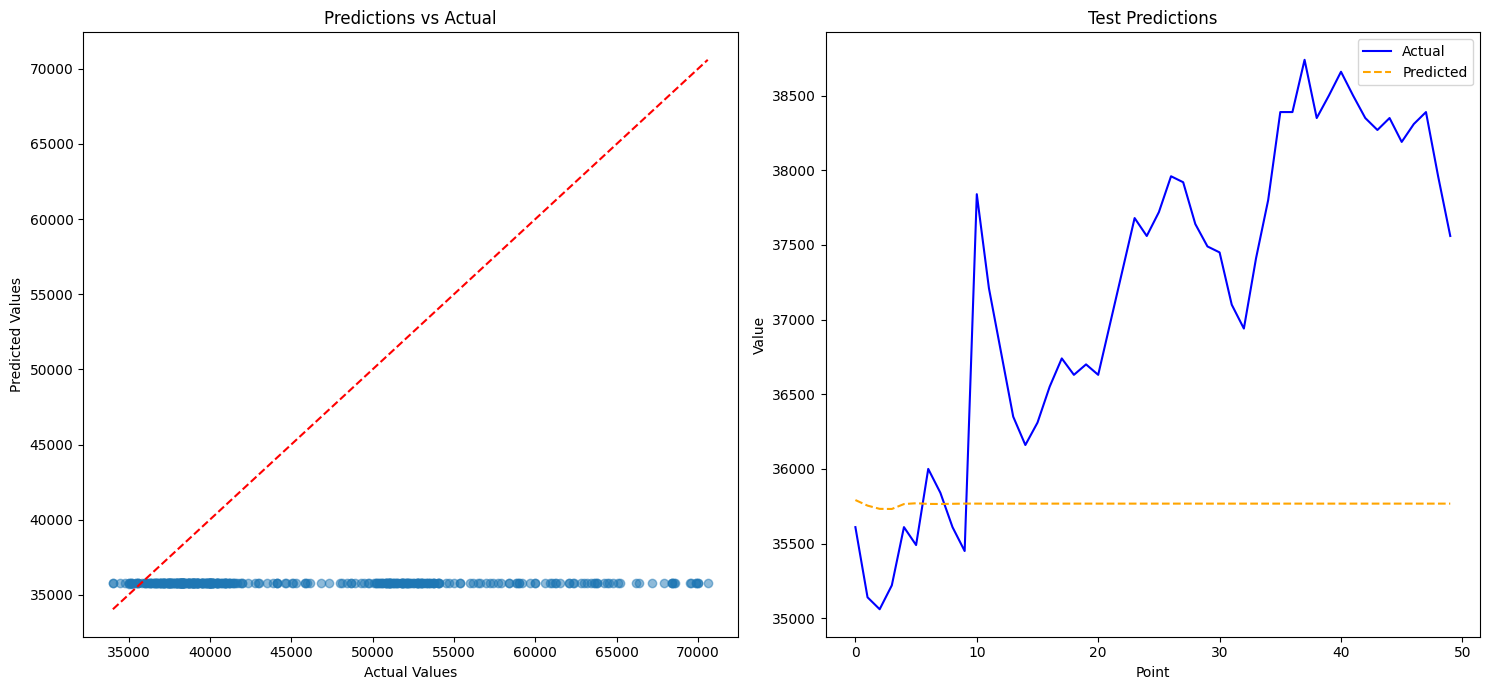

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\CMG_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMT_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9881063419007842
MSE: 423027.9763036237
RMSE: 650.4060088157424
MAE: 376.01201811754413
MAPE%: 3.10%

EVALUATE METRICS ON THE TEST SET
R2: -0.9829183133977684
MSE: 35176201.790142834
RMSE: 5930.952856847105
MAE: 4303.179925185072
MAPE%: 22.82%


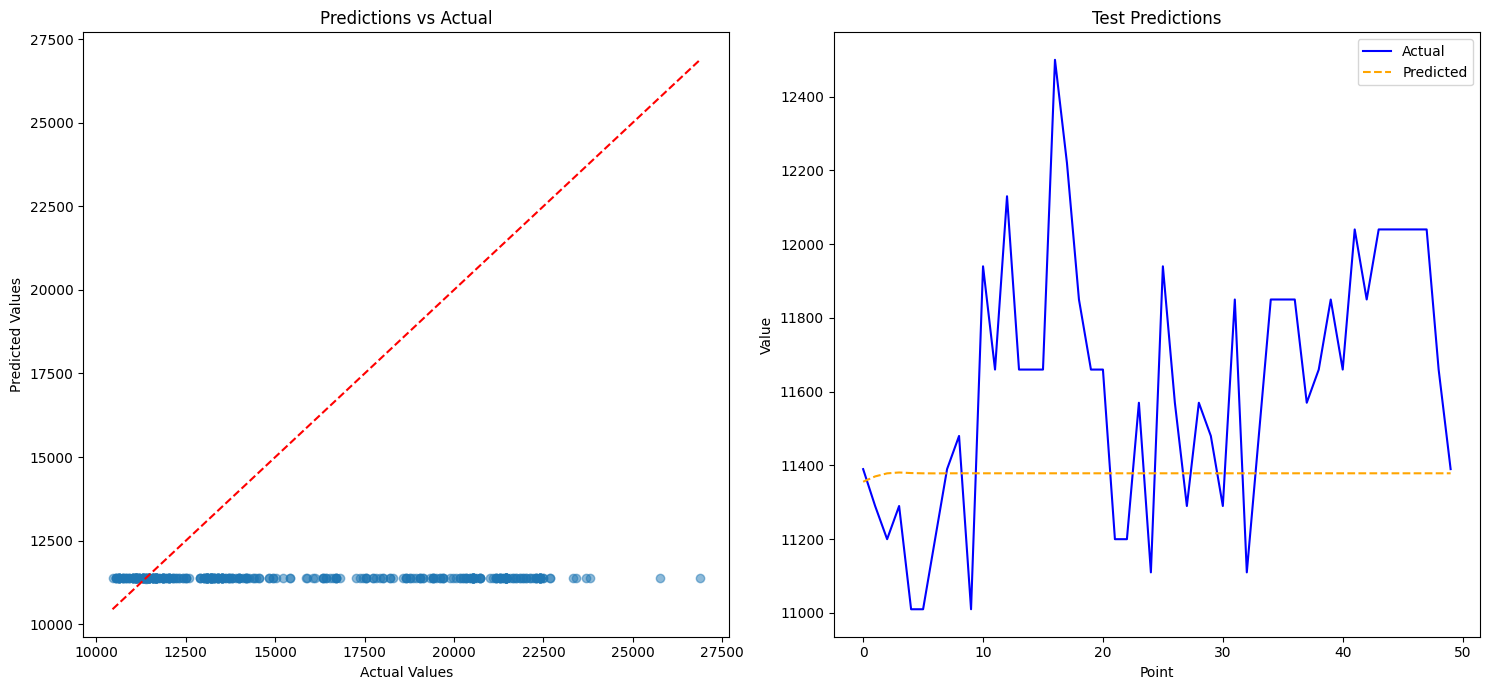

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\CMT_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/DGW_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9968518624289702
MSE: 1045329.4352280303
RMSE: 1022.4135343529204
MAE: 613.1678291391012
MAPE%: 2.40%

EVALUATE METRICS ON THE TEST SET
R2: -9.107886998413917
MSE: 226491084.58139798
RMSE: 15049.620745434018
MAE: 14285.859762610264
MAPE%: 32.16%


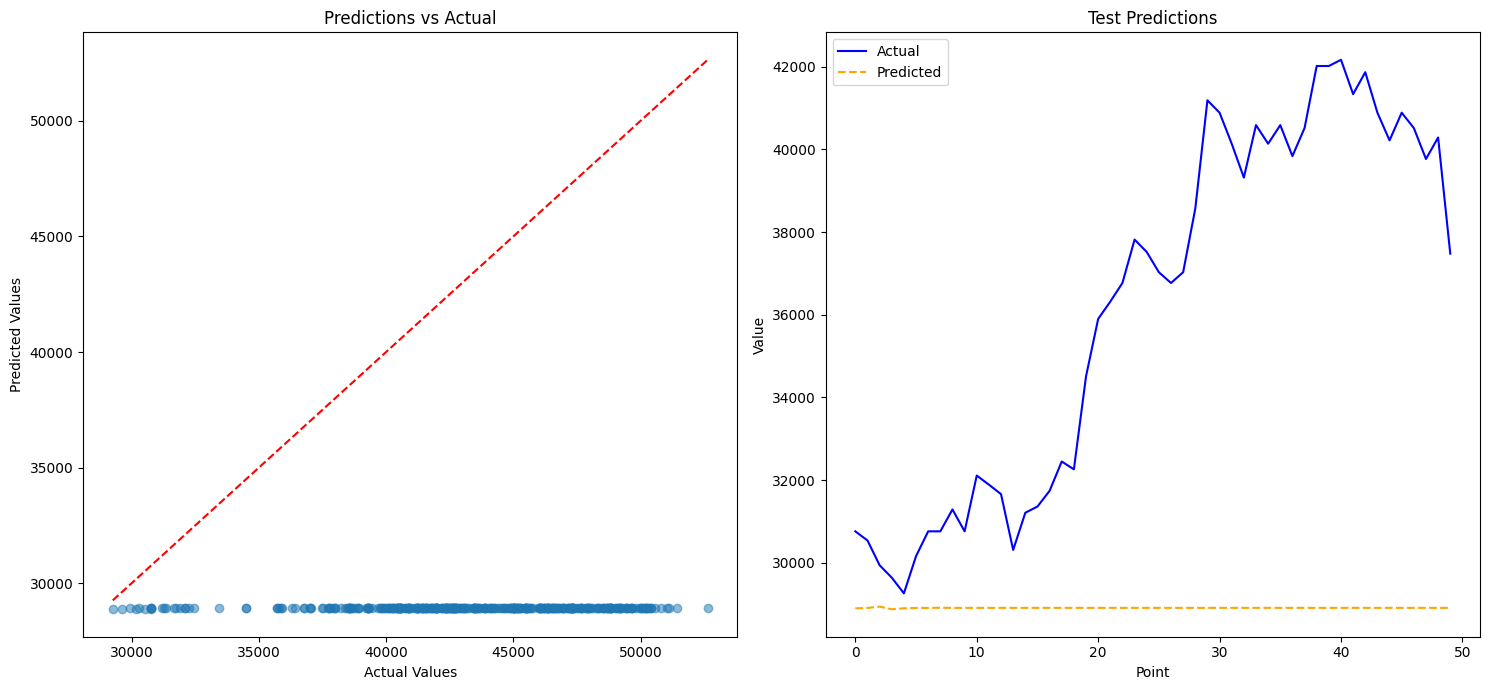

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\DGW_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/ELC_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9955990002627113
MSE: 79248.00902859536
RMSE: 281.51022899460577
MAE: 161.86103266315746
MAPE%: 2.14%

EVALUATE METRICS ON THE TEST SET
R2: -5.001932409681503
MSE: 150695352.1268805
RMSE: 12275.803522657101
MAE: 11206.484161025879
MAPE%: 50.55%


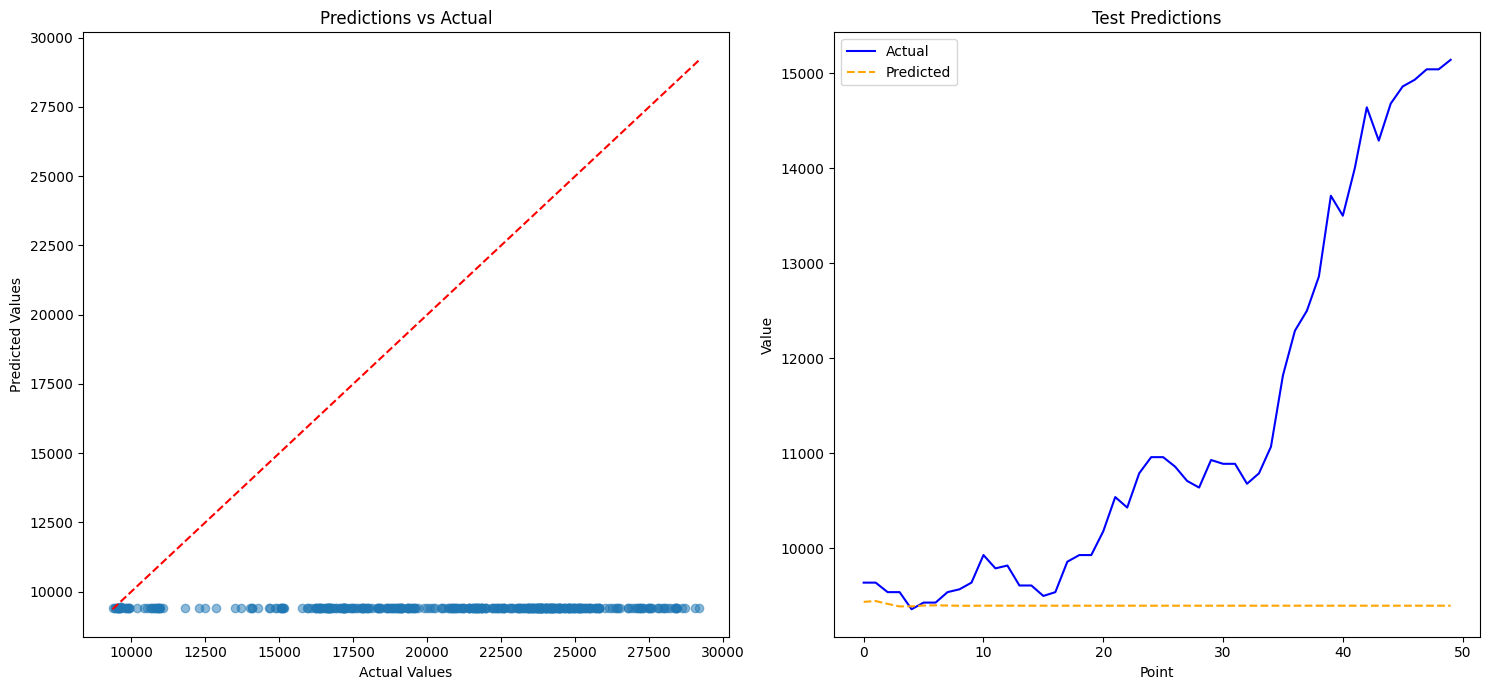

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\ELC_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9973708695423152
MSE: 798988.8702475395
RMSE: 893.8617735687882
MAE: 487.68231706778107
MAPE%: 1.28%

EVALUATE METRICS ON THE TEST SET
R2: -2.3554918086015624
MSE: 2134182654.481839
RMSE: 46197.21479139017
MAE: 38710.9875985244
MAPE%: 34.35%


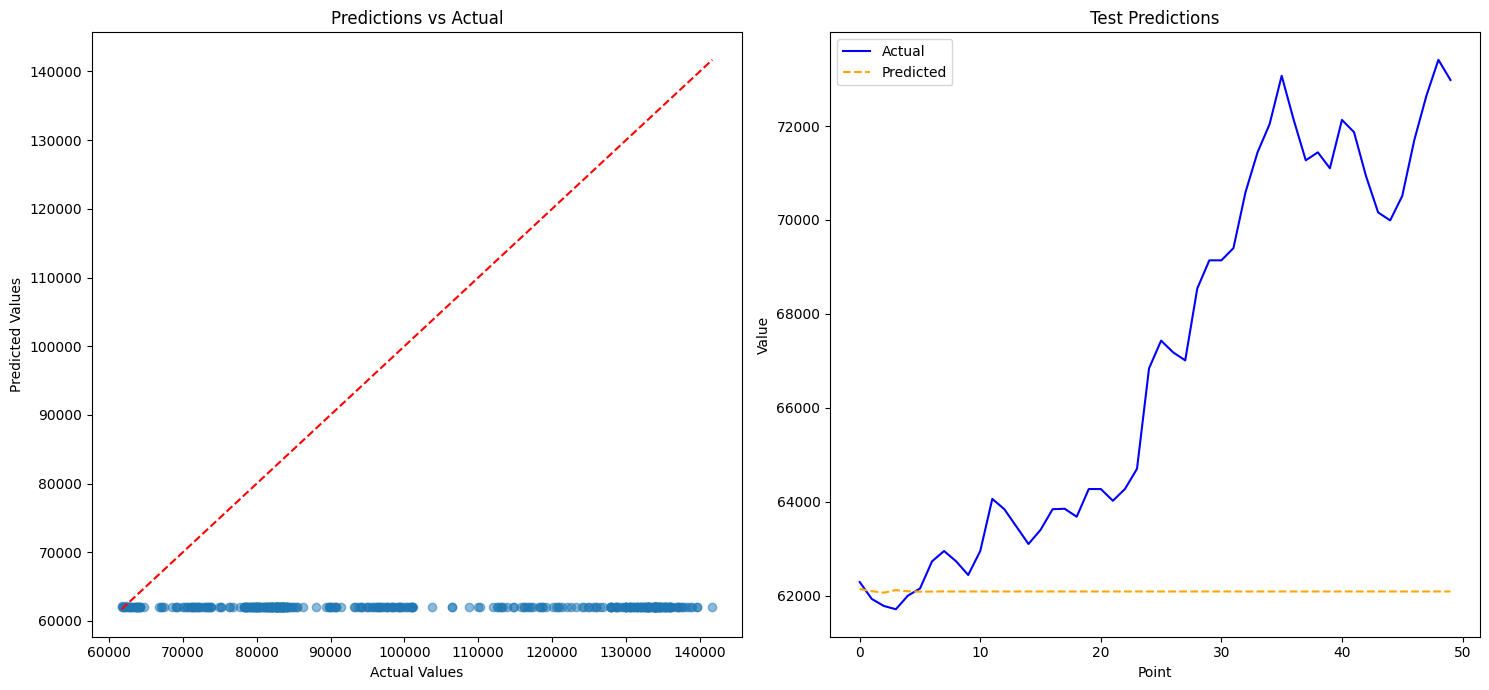

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\FPT_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/SAM_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9908231450328526
MSE: 150031.08224985813
RMSE: 387.3384595542484
MAE: 208.08844475097496
MAPE%: 1.86%

EVALUATE METRICS ON THE TEST SET
R2: -0.8467704401345526
MSE: 438040.0597465518
RMSE: 661.8459486516117
MAE: 593.0579934412642
MAPE%: 9.00%


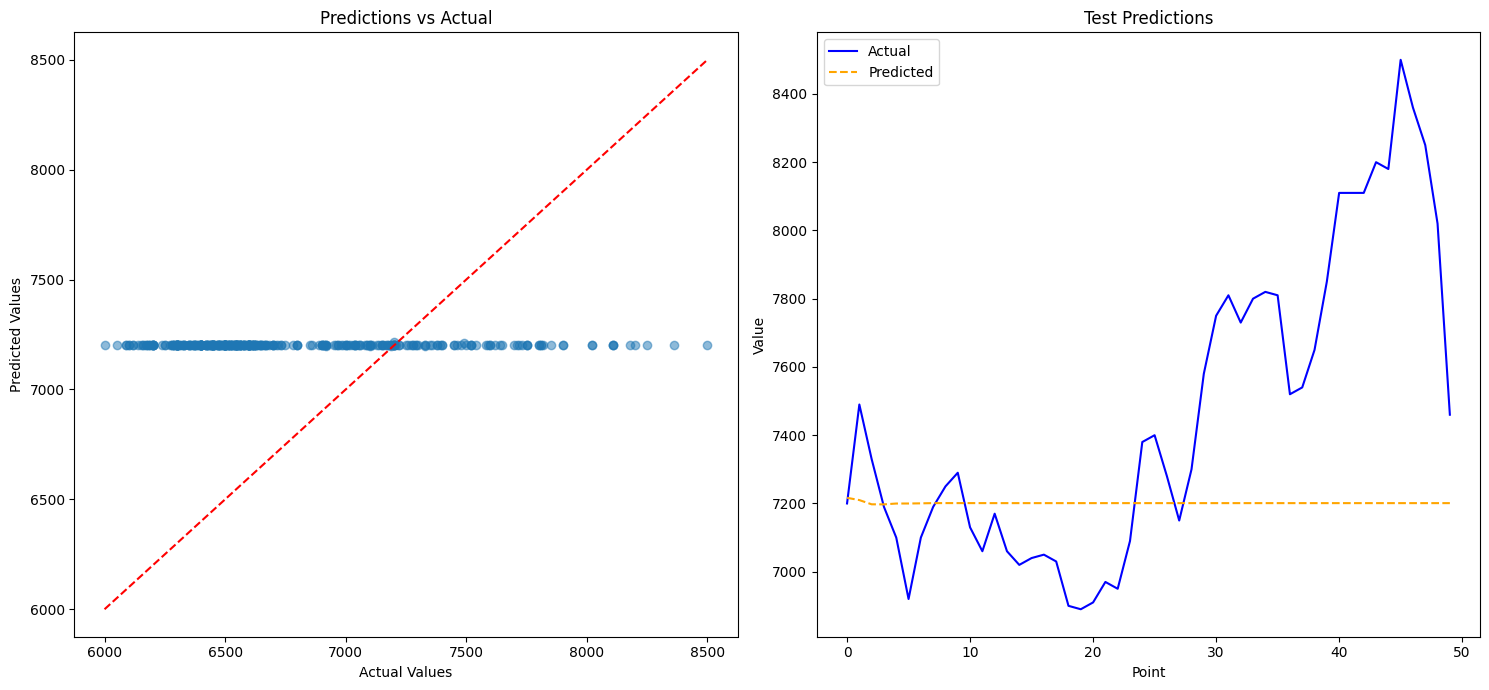

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\SAM_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VGC_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9928516379730071
MSE: 1172094.1589946179
RMSE: 1082.6329752019462
MAE: 638.1525541252649
MAPE%: 2.06%

EVALUATE METRICS ON THE TEST SET
R2: -1.239708361020226
MSE: 57101986.64371239
RMSE: 7556.585647216101
MAE: 6108.647011365622
MAPE%: 11.98%


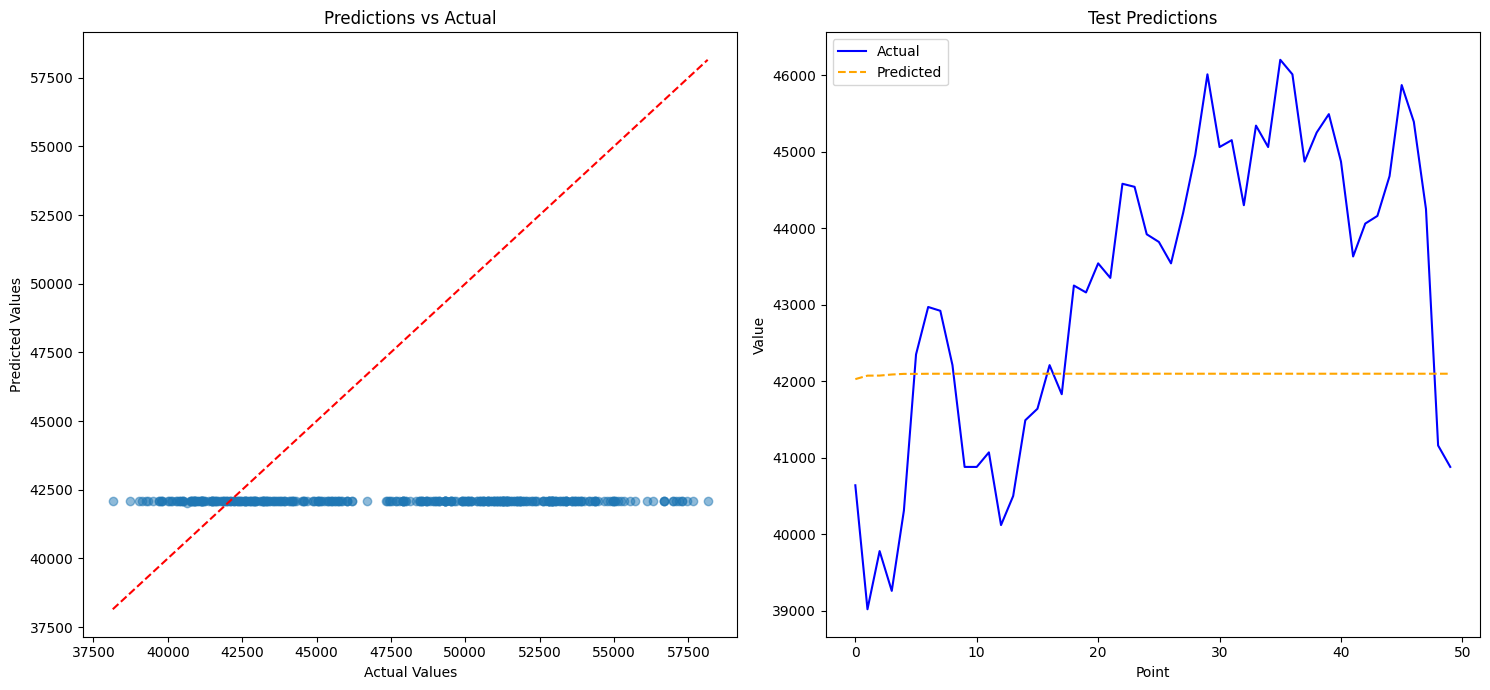

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VGC_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VGI_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9728538180036914
MSE: 986123.5146125896
RMSE: 993.037519237108
MAE: 627.7670459616559
MAPE%: 2.26%

EVALUATE METRICS ON THE TEST SET
R2: -0.9435940673959959
MSE: 1404400339.5733125
RMSE: 37475.32974602508
MAE: 26123.617298782236
MAPE%: 38.22%


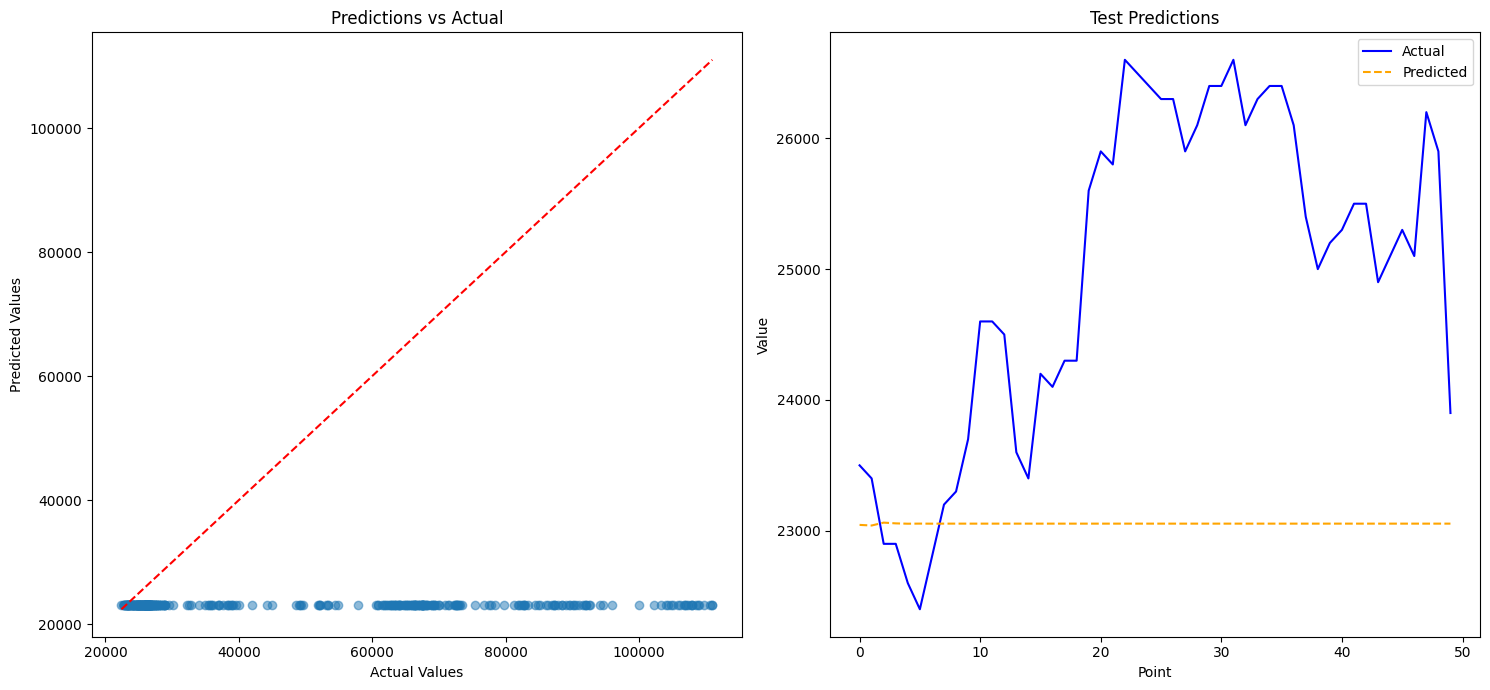

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VGI_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VTL_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.9700900939233718
MSE: 1130428.6377308622
RMSE: 1063.2161763869387
MAE: 270.4744463076882
MAPE%: 1.62%

EVALUATE METRICS ON THE TEST SET
R2: -0.43043538281871574
MSE: 19214375.0
RMSE: 4383.420468081975
MAE: 2766.4772727272725
MAPE%: 46.30%


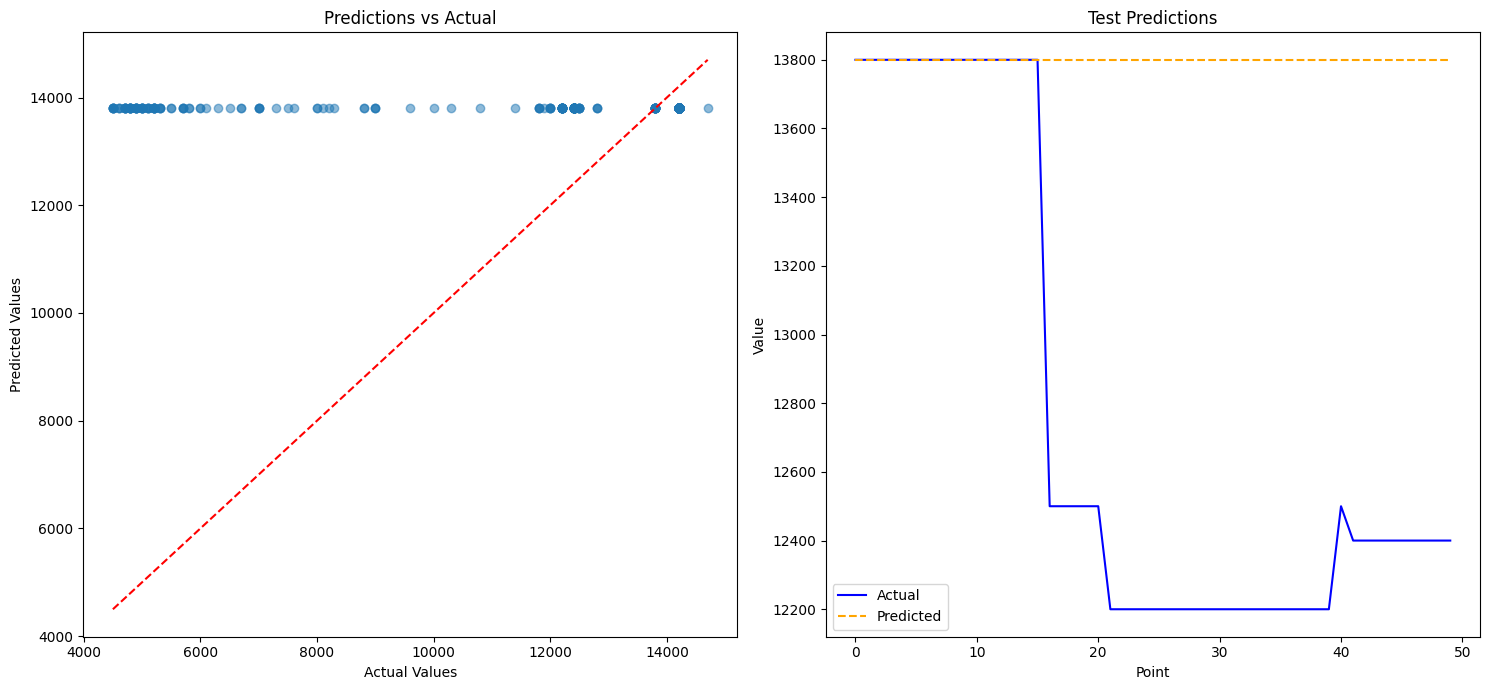

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VTL_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VTP_stock_data.csv

EVALUATE METRICS ON THE TRAIN SET
R2: 0.983181902716332
MSE: 2687331.7913999716
RMSE: 1639.3083271306748
MAE: 762.0678445535434
MAPE%: 1.56%

EVALUATE METRICS ON THE TEST SET
R2: -2.153008844344564
MSE: 1401827061.7248766
RMSE: 37440.981046506735
MAE: 30941.61992467853
MAPE%: 41.80%


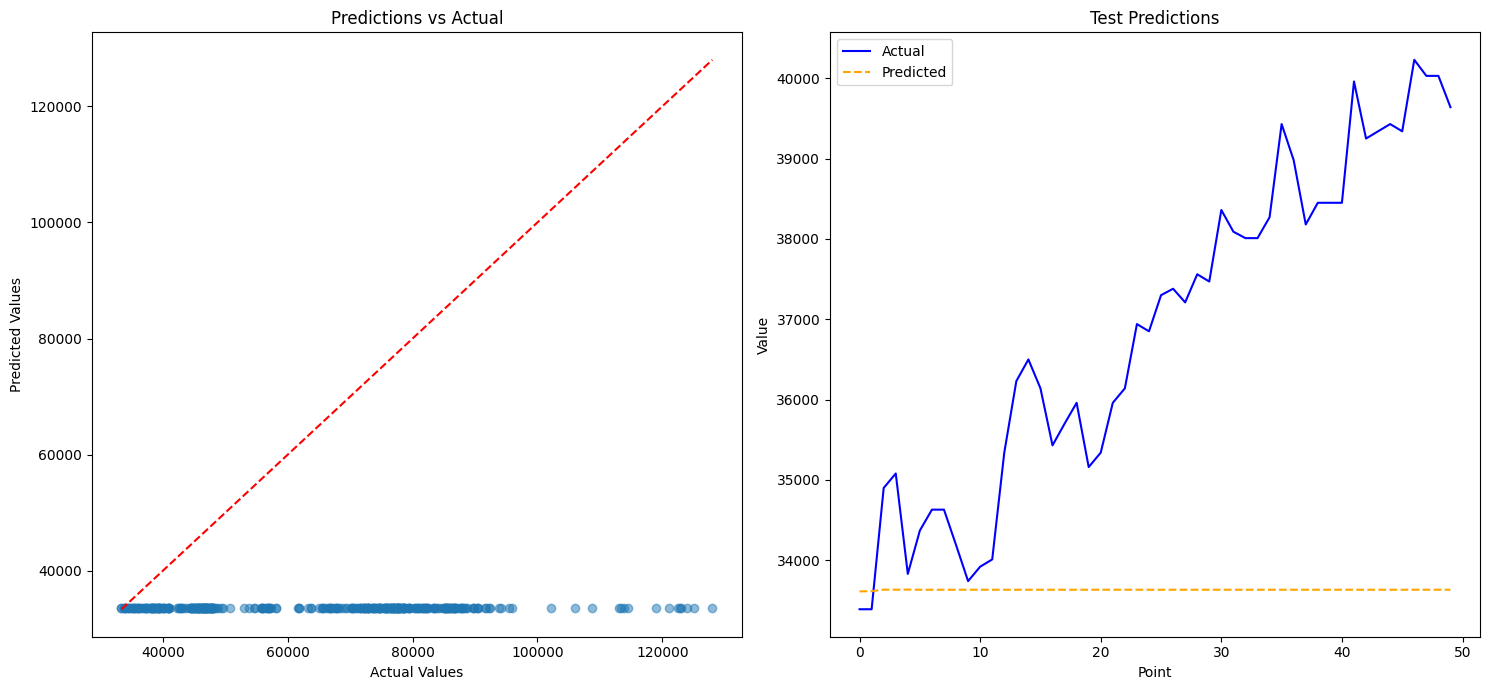

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VTP_stock_data_TrainingModelsResults.txt


In [5]:
import os

# Đường dẫn tới thư mục chứa các file CSV
folder_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/"

# Đường dẫn tới thư mục lưu kết quả
output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results"

# Tạo thư mục lưu kết quả nếu chưa tồn tại
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lấy danh sách tất cả các file CSV trong thư mục
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Chạy model process cho từng file
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    print()
    try:
        # Khởi tạo model và chỉ định thư mục lưu kết quả
        model = TimeSeriesARIMAModel(file_path, output_dir=output_dir)
        model.process()
    except Exception as e:
        print(f"An error occurred while processing {file_path}: {e}")
    print("=" * 50)  # Ngăn cách giữa các file
